# SEP Data Loader
**A collection of Python data loader for Solar Energetic Particle measurements**

### Table of Contents

* [SolO/EPD](#Solar_Orbiter_EPD)
    * [1. Example with EPT and STEP data ](#Solar_Orbiter_EPD_1)
    * [2. Example with different viewing directions of EPT ](#Solar_Orbiter_EPD_2)
* [PSP/ISOIS](#psp-isois-loader)
* [SOHO](#soho-loader)
* [STEREO](#stereo-loader)
* [Wind/3DP](#wind-3dp-loader)
* [FAQ / Problems](#faq)

    
---

# Solar Orbiter EPD (solo-epd-loader) <a class="anchor" id="Solar_Orbiter_EPD"></a>

- GitHub: https://github.com/jgieseler/solo-epd-loader
- PyPI: https://pypi.org/project/solo-epd-loader
- conda: https://anaconda.org/conda-forge/solo-epd-loader

Python data loader for Solar Orbiter's (SolO) [Energetic Particle Detector (EPD)](http://espada.uah.es/epd/). At the moment provides level 2 (l2) and low latency (ll) data ([more details on data levels here](http://espada.uah.es/epd/EPD_data_overview.php)) obtained through CDF files from ESA's [Solar Orbiter Archive (SOAR)](http://soar.esac.esa.int/soar) for the following sensors:

- Electron Proton Telescope (EPT)
- High Energy Telescope (HET)
- SupraThermal Electrons and Protons (STEP)

Current caveats:

- Only the standard ``rates`` data products are supported (i.e., no ``burst`` or ``high cadence`` data).
- Only electrons, protons and alpha particles are processed (i.e., for HET He3, He4, C, N, O, Fe are omitted at the moment).
- For STEP, the sectored data is not yet available, and data is only available until Oct 2021 due to the change of the data product (will be updated soon).
- The Suprathermal Ion Spectrograph (SIS) is not yet included.

#### Local installation

In order to run it locally on your computer, you need to install `solo-epd-loader` via pip:
``` bash
$ pip install solo-epd-loader
```

or via conda:
``` bash
$ conda install -c conda-forge solo-epd-loader
```

#### Input parameters

-  ``sensor``: ``'ept'``, ``'het'``, or ``'step'`` (string)
-  ``level``: ``'ll'`` or ``'l2'`` (string)
-  ``startdate``, ``enddate``: Datetime object (e.g., ``dt.date(2021,12,31)`` or ``dt.datetime(2021,4,15)``) or integer of the form yyyymmdd with empty positions filled with zeros, e.g. ``20210415`` (if no ``enddate`` is provided, ``enddate = startdate`` will be used)
-  ``viewing``: ``'sun'``, ``'asun'``, ``'north'``, ``'south'`` (string) or ``None``; not
   needed for ``sensor = 'step'``
-  ``path``: directory in which Solar Orbiter data is/should be
   organized; e.g. ``'/home/userxyz/solo/data/'`` (string). See `Data folder structure`_ for more details.
-  ``autodownload``: if ``True`` will try to download missing data files
   from SOAR (bolean)

#### Importing and general settings

In [1]:
import datetime as dt
import numpy as np
import os
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from solo_epd_loader import epd_load

# omit Pandas' PerformanceWarning
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

#### Define some general options:

In [2]:
# set your local path where you want to save the data files:
path = f"{os.getcwd()}/data/"

# whether missing data files should automatically downloaded from SOAR:
autodownload = True

# define some optional plotting settings
color = {'sun': 'crimson', 'asun': 'orange', 'north': 'darkslateblue', 'south': 'c'}  # define SolO/EPD colors

---
### 1. Example with EPT and STEP data <a class="anchor" id="Solar_Orbiter_EPD_1"></a>



Define some basic options:

In [3]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2020, 7, 8)
enddate = dt.datetime(2020, 7, 24)

# change time resolution to get smoother curve
resample = '60min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

Obtain the data, downloading them to `path` if needed:

In [ ]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

# load step data
df_step, energies_step = epd_load(sensor='step', level='l2', 
                                  startdate=startdate, enddate=enddate,
                                  path=path, autodownload=autodownload)

Get info on energy channels:

In [5]:
energies_ept

{'Ion_Bins_Text': array([['0.0485 - 0.0548 MeV'],
        ['0.0511 - 0.0580 MeV'],
        ['0.0548 - 0.0602 MeV'],
        ['0.0580 - 0.0637 MeV'],
        ['0.0602 - 0.0674 MeV'],
        ['0.0637 - 0.0695 MeV'],
        ['0.0695 - 0.0735 MeV'],
        ['0.0735 - 0.0775 MeV'],
        ['0.0775 - 0.0812 MeV'],
        ['0.0812 - 0.0862 MeV'],
        ['0.0862 - 0.0909 MeV'],
        ['0.0909 - 0.0967 MeV'],
        ['0.0967 - 0.1023 MeV'],
        ['0.1023 - 0.1090 MeV'],
        ['0.1090 - 0.1164 MeV'],
        ['0.1164 - 0.1240 MeV'],
        ['0.1240 - 0.1324 MeV'],
        ['0.1324 - 0.1419 MeV'],
        ['0.1419 - 0.1513 MeV'],
        ['0.1513 - 0.1627 MeV'],
        ['0.1627 - 0.1741 MeV'],
        ['0.1741 - 0.1875 MeV'],
        ['0.1875 - 0.2029 MeV'],
        ['0.2029 - 0.2183 MeV'],
        ['0.2183 - 0.2357 MeV'],
        ['0.2357 - 0.2541 MeV'],
        ['0.2541 - 0.2746 MeV'],
        ['0.2746 - 0.2981 MeV'],
        ['0.2981 - 0.3215 MeV'],
        ['0.3215 - 0.3491 

In [6]:
energies_step

{'Bins_Text': array([['0.0057 - 0.0090 MeV/n'],
        ['0.0060 - 0.0091 MeV/n'],
        ['0.0062 - 0.0092 MeV/n'],
        ['0.0065 - 0.0094 MeV/n'],
        ['0.0069 - 0.0096 MeV/n'],
        ['0.0071 - 0.0098 MeV/n'],
        ['0.0074 - 0.0101 MeV/n'],
        ['0.0078 - 0.0105 MeV/n'],
        ['0.0083 - 0.0109 MeV/n'],
        ['0.0086 - 0.0112 MeV/n'],
        ['0.0097 - 0.0128 MeV/n'],
        ['0.0115 - 0.0141 MeV/n'],
        ['0.0122 - 0.0148 MeV/n'],
        ['0.0127 - 0.0153 MeV/n'],
        ['0.0135 - 0.0163 MeV/n'],
        ['0.0143 - 0.0171 MeV/n'],
        ['0.0149 - 0.0177 MeV/n'],
        ['0.0159 - 0.0186 MeV/n'],
        ['0.0169 - 0.0195 MeV/n'],
        ['0.0176 - 0.0202 MeV/n'],
        ['0.0186 - 0.0213 MeV/n'],
        ['0.0198 - 0.0224 MeV/n'],
        ['0.0209 - 0.0237 MeV/n'],
        ['0.0223 - 0.0248 MeV/n'],
        ['0.0231 - 0.0257 MeV/n'],
        ['0.0245 - 0.0274 MeV/n'],
        ['0.0262 - 0.0288 MeV/n'],
        ['0.0272 - 0.0298 MeV/n'],
       

Make the plot:

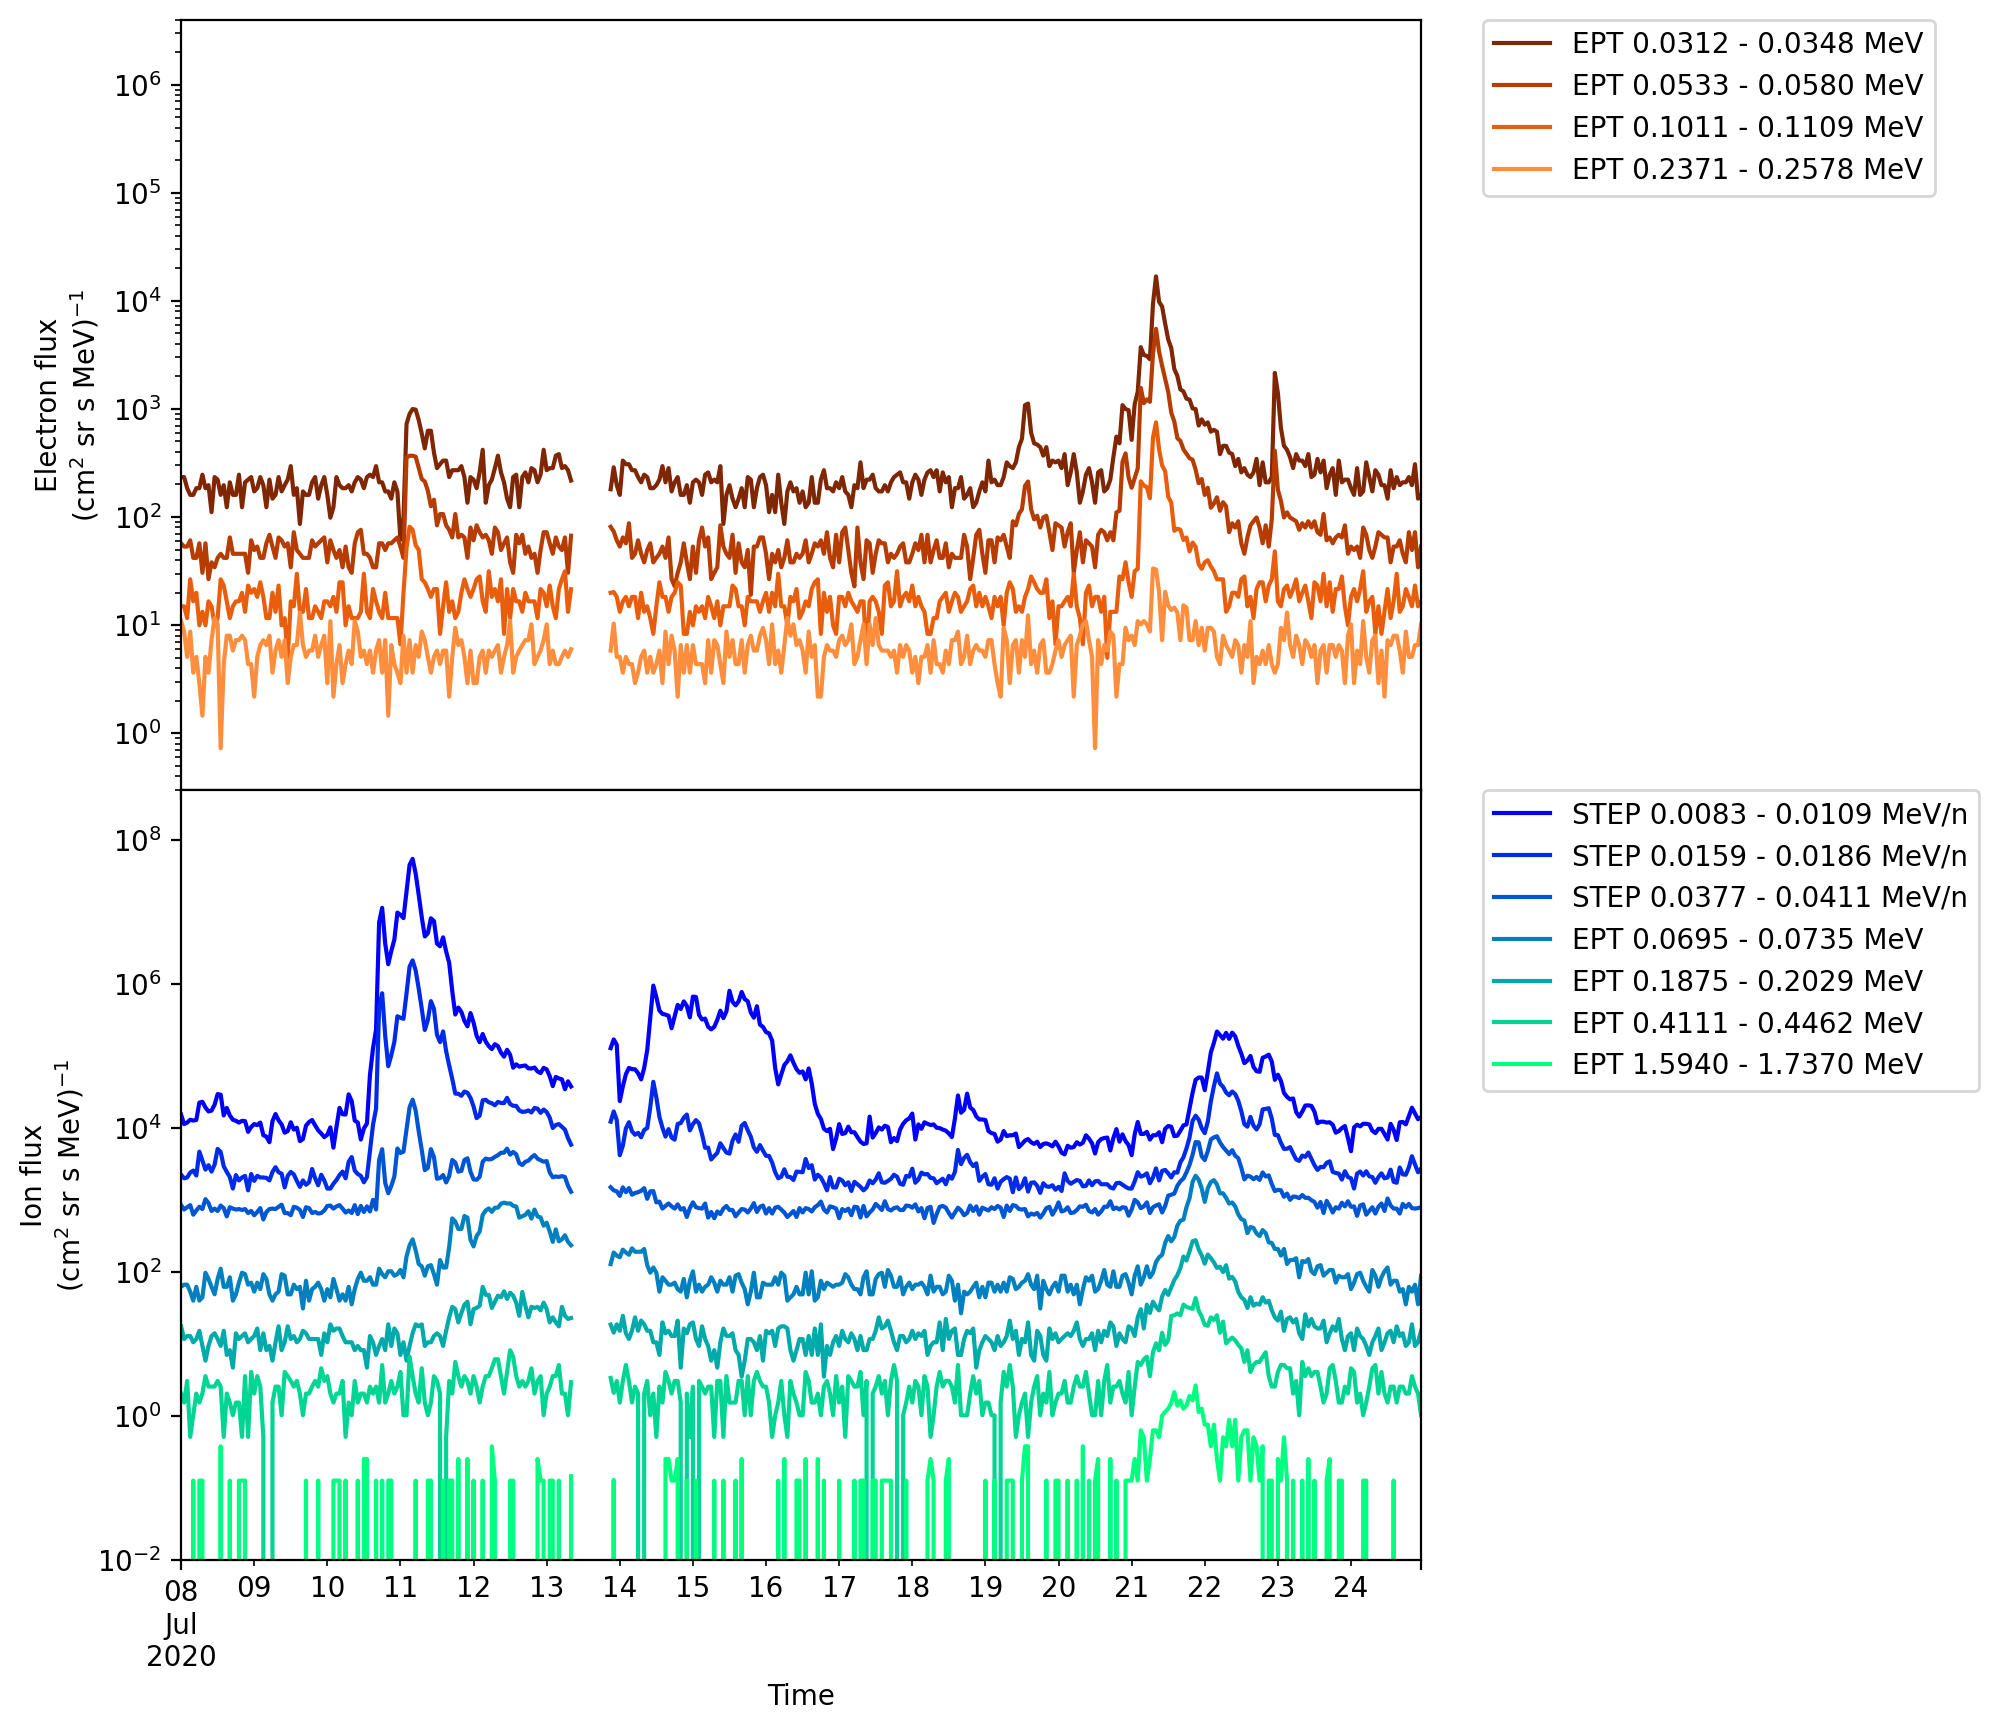

In [7]:
fig, axs = plt.subplots(2, sharex=True, figsize=(8, 10), dpi=200)
axs[0].set_prop_cycle('color', plt.cm.Oranges_r(np.linspace(0,1,7)))
axs[1].set_prop_cycle('color', plt.cm.winter(np.linspace(0,1,7)))

# plot selection of ept electron channels
for channel in [0, 8, 16, 26]:
   df_electrons_ept['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Electron_Bins_Text"][channel][0])

# plot selection of step ion channels
for channel in [8, 17, 33]:
   df_step['Magnet_Flux'][channel].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='STEP '+energies_step["Bins_Text"][channel][0])

# plot selection of ept ion channels
for channel in [6, 22, 32, 48]:
   df_protons_ept['Ion_Flux'][f'Ion_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Ion_Bins_Text"][channel][0])

axs[0].set_ylim([0.3, 4e6])
axs[1].set_ylim([0.01, 5e8])

axs[0].set_ylabel("Electron flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[1].set_ylabel("Ion flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(hspace=0)

---
### 2. Example with different viewing directions of EPT <a class="anchor" id="Solar_Orbiter_EPD_2"></a>



Define some basic options:

In [8]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2020, 12, 10)
enddate = dt.datetime(2020, 12, 11)

# define the sensor to use:
sensor = 'ept'

# define data level to use ('l2' or 'll'):
level = 'l2'

Obtain the data, downloading them to `path` if needed:

In [9]:
# load data
df_protons_sun, df_electrons_sun, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                      enddate=enddate, viewing='sun',
                                                      path=path, autodownload=True)
df_protons_asun, df_electrons_asun, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                        enddate=enddate, viewing='asun',
                                                        path=path, autodownload=True)
df_protons_south, df_electrons_south, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='south',
                                                          path=path, autodownload=True)
df_protons_north, df_electrons_north, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='north',
                                                          path=path, autodownload=True)

Make the plot:

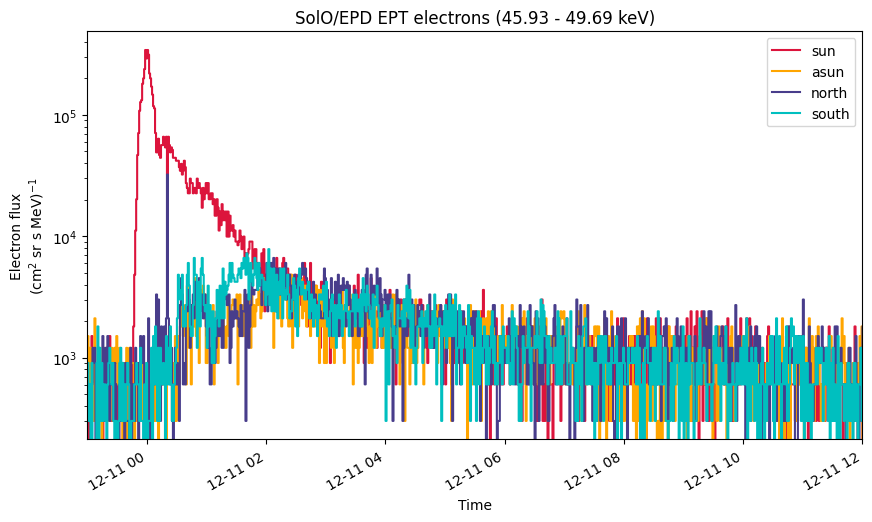

In [10]:
# energy channel to use; cf. "energies" for the energies
channel = 6

fig, ax = plt.subplots(figsize=(10, 6))
ax = df_electrons_sun['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='sun', 
                                                                        color=color['sun'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_asun['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='asun', 
                                                                        color=color['asun'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_north['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='north', 
                                                                        color=color['north'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_south['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='south', 
                                                                        color=color['south'],
                                                                        drawstyle="steps-mid")

ax.set_xlim([dt.datetime(2020, 12, 10, 23, 0), dt.datetime(2020, 12, 11, 12, 0)])

ax.set_ylabel("Electron flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
ax.set_title(f"SolO/EPD EPT electrons ({1000*energies['Electron_Bins_Low_Energy'][channel]:.2f}"
             + f" - {1000*energies['Electron_Bins_Low_Energy'][channel+1]:.2f} keV)")
ax.legend()

---
# PSP/ISOIS (psp-isois-loader) <a class="anchor" id="psp-isois-loader"></a>

- GitHub: https://github.com/jgieseler/psp-isois-loader

Python data loader for PSP/ISOIS instrument. At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

- `PSP_ISOIS-EPIHI_L2-HET-RATES60`: Parker Solar Probe ISOIS EPI-Hi Level 2 HET 1-minute Rates ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPIHI_L2-HET-RATES60), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epihi_l2-het-rates60_00000000_v01.skt))
- `PSP_ISOIS-EPIHI_L2-HET-RATES3600`: Parker Solar Probe ISOIS EPI-Hi Level 2 HET Hourly Rates ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPIHI_L2-HET-RATES3600), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epihi_l2-het-rates3600_00000000_v01.skt)) (higher coverage than 'RATES60' before mid-2021)
- `PSP_ISOIS-EPILO_L2-PE`: Parker Solar Probe ISOIS EPI-Lo Level 2 Particle Energy ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPILO_L2-PE), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epilo_l2-pe_00000000_v01.skt))

Current caveats

- A lot of PSP/ISOIS datasets are not supported at the moment, for example:
 - PSP_ISOIS-EPIHI_L2-LET1-RATES60
 - PSP_ISOIS-EPIHI_L2-LET2-RATES60
 - PSP_ISOIS-EPILO_L2-IC
- For EPIHI, energy values are only loaded from the first day of the interval! (For EPILO, energy values are the mean of the whole loaded interval.)
- EPILO energy tables changed on June 14, 2021.
- Some (multi-dimensional) parts of the data files are skipped (user warning is provided in this cases).

#### Local installation

In order to run it locally on your computer, you need to install `psp-isois-loader` via pip:
``` bash
$ pip install git+https://github.com/jgieseler/psp-isois-loader
```

#### Imports

In [11]:
from psp_isois_loader import psp_isois_load
import datetime as dt

#### Define options


-  ``dataset``: (see above for explanation)
 - ``'PSP_ISOIS-EPIHI_L2-HET-RATES60'``
 - ``'PSP_ISOIS-EPIHI_L2-HET-RATES3600'`` (higher coverage than ``'RATES60'`` before mid-2021)
 - ``'PSP_ISOIS-EPILO_L2-PE'``
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data (~24 seconds) is resamepled. By default ``'1min'``.
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/psp/isois/'``. By default `None`. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data).
-  ``epilo_channel``: String, optional. Only used for EPILO data. Channel of EPILO: 'E', 'F', or 'G'. By default 'F'.
-  ``epilo_threshold``: Integer or float, optional. Only used for EPILO data. Replace all flux/countrate values in ``df`` above ``epilo_threshold`` with ``np.nan``, by default ``None``.

In [12]:
dataset = "PSP_ISOIS-EPIHI_L2-HET-RATES60"
startdate = dt.datetime(2021, 10, 28)
enddate = "2021/10/30"
path = None
resample = "1min"

#### Load data

In [13]:
df, meta = psp_isois_load(dataset=dataset, startdate=startdate, enddate=enddate,
                          path=path, resample=resample)

In [14]:
df

,A_Electrons_0,A_Electrons_1,A_Electrons_2,A_Electrons_3,A_Electrons_4,A_Electrons_5,A_Electrons_6,A_Electrons_7,A_Electrons_8,A_Electrons_9,...,B_H_Uncertainty_5,B_H_Uncertainty_6,B_H_Uncertainty_7,B_H_Uncertainty_8,B_H_Uncertainty_9,B_H_Uncertainty_10,B_H_Uncertainty_11,B_H_Uncertainty_12,B_H_Uncertainty_13,B_H_Uncertainty_14
Epoch,,,,,,,,,,,,,,,,,,,,,
2021-10-28 07:54:30,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
2021-10-28 07:55:30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
2021-10-28 07:56:30,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
2021-10-28 07:57:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
2021-10-28 07:58:30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-29 23:55:30,7.0,36.0,104.0,134.0,186.0,104.0,95.0,61.0,30.0,15.0,...,0.141131,0.129024,0.112917,0.087248,0.072966,0.045156,0.067013,0.0,NaN,NaN
2021-10-29 23:56:30,7.0,34.0,88.0,99.0,171.0,95.0,86.0,37.0,36.0,14.0,...,0.152219,0.136818,0.111783,0.084093,0.069688,0.068497,0.071357,0.0,NaN,NaN
2021-10-29 23:57:30,2.0,40.0,71.0,129.0,149.0,115.0,79.0,46.0,29.0,19.0,...,0.158609,0.122433,0.106368,0.095413,0.076101,0.065423,0.054704,0.0,NaN,NaN


In [15]:
meta

{'H_ENERGY': array([ 7.3360386,  8.72407  , 10.374725 , 12.337697 , 14.672077 ,
        17.44814  , 20.74945  , 24.675394 , 29.344154 , 34.89628  ,
        41.4989   , 49.35079  , 58.68831  , 69.79256  , 82.9978   ],
       dtype=float32),
 'H_ENERGY_DELTAPLUS': array([0.66396827, 0.7895957 , 0.93899286, 1.116657  , 1.3279365 ,
        1.5791914 , 1.8779857 , 2.233314  , 2.655873  , 3.158383  ,
        3.7559714 , 4.466628  , 5.311746  , 6.316766  , 7.511943  ],
       dtype=float32),
 'H_ENERGY_DELTAMINUS': array([0.60886157, 0.7240625 , 0.86106026, 1.023979  , 1.2177231 ,
        1.448125  , 1.7221205 , 2.047958  , 2.4354463 , 2.89625   ,
        3.444241  , 4.095916  , 4.8708925 , 5.7925    , 6.888482  ],
       dtype=float32),
 'H_ENERGY_LABL': array([['  6.7 -   8.0 MeV'],
        ['  8.0 -   9.5 MeV'],
        ['  9.5 -  11.3 MeV'],
        [' 11.3 -  13.5 MeV'],
        [' 13.5 -  16.0 MeV'],
        [' 16.0 -  19.0 MeV'],
        [' 19.0 -  22.6 MeV'],
        [' 22.6 -  26.9 M

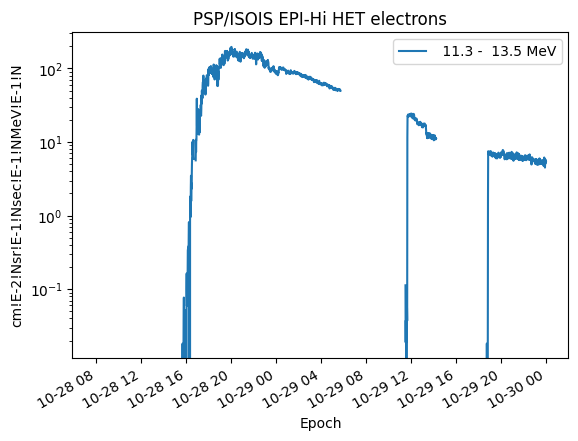

In [16]:
df.A_H_Flux_3.plot(logy=True, ylabel=meta['H_FLUX_UNITS'], label=meta['H_ENERGY_LABL'][3][0], 
               title='PSP/ISOIS EPI-Hi HET electrons')
plt.legend()

---
# SOHO (soho-loader) <a class="anchor" id="soho-loader"></a>

- GitHub: https://github.com/jgieseler/soho-loader

Python data loader for SOHO particle instruments. At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

-   ``'SOHO_CELIAS-PM_30S'``: SOHO CELIAS-PM 30 second data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_CELIAS-PM_30S))
-   ``'SOHO_CELIAS-SEM_15S'``: SOHO CELIAS-SEM 15 second data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_CELIAS-SEM_15S))    
-   ``'SOHO_COSTEP-EPHIN_L2-1MIN'``: SOHO COSTEP-EPHIN Level2 intensity 1 minute data ([Info](https://www.ieap.uni-kiel.de/et/ag-heber/costep/data.php)) [1]
-   ``'SOHO_COSTEP-EPHIN_L3I-1MIN'``: SOHO COSTEP-EPHIN Level3 intensity 1 minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_COSTEP-EPHIN_L3I-1MIN))
-   ``'SOHO_ERNE-LED_L2-1MIN'``: SOHO ERNE-LED Level2 1 minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_ERNE-LED_L2-1MIN))
-   ``'SOHO_ERNE-HED_L2-1MIN'``: SOHO ERNE-HED Level2 1 minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_ERNE-HED_L2-1MIN))

[1] SOHO COSTEP-EPHIN Level2 intensity 1 minute data is directly obtained through ASCII files from the [server of the instrument team](http://ulysses.physik.uni-kiel.de/costep/level2/), not via SunPy/CDAWeb.

#### Local installation

In order to run it locally on your computer, you need to install `soho-loader` via pip:
``` bash
$ pip install git+https://github.com/jgieseler/soho-loader
```

#### Imports

In [17]:
from soho_loader import soho_load
import datetime as dt

#### Define options
-  ``dataset``: ``'SOHO_CELIAS-PM_30S'``, ``'SOHO_CELIAS-SEM_15S'``, ``'SOHO_COSTEP-EPHIN_L2-1MIN'``, ``'SOHO_COSTEP-EPHIN_L3I-1MIN'``, ``'SOHO_ERNE-LED_L2-1MIN'``, or ``'SOHO_ERNE-HED_L2-1MIN'``. See above for explanation.
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/soho/'``. By default ``None``. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data).
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data is resamepled. By default ``None``.
-  ``pos_timestamp``: String, optional. Change the position of the timestamp: ``'center'`` or ``'start'`` of the accumulation interval, by default ``None``.
-  ``max_conn``: Integer, optional. The number of parallel download slots used by ``Fido.fetch``, by default ``5``.

In [18]:
dataset="SOHO_ERNE-HED_L2-1MIN"
startdate=dt.datetime(2021, 10, 28)
enddate="2021/10/30"
path=None
resample="1min"
pos_timestamp=None

#### Load data

In [19]:
df, meta = soho_load(dataset=dataset, startdate=startdate, enddate=enddate,
                     path=path, resample=resample, pos_timestamp=pos_timestamp)

In [20]:
df

,AH_0,AH_1,AH_2,AH_3,AH_4,AH_5,AH_6,AH_7,AH_8,AH_9,...,PHC_1,PHC_2,PHC_3,PHC_4,PHC_5,PHC_6,PHC_7,PHC_8,PHC_9,est
Epoch,,,,,,,,,,,,,,,,,,,,,
2021-10-28 00:00:30,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000048,0.000113,0.000000,...,0.0,0.0,1.0,2.0,2.0,8.0,22.0,5.0,0.0,16512.0
2021-10-28 00:01:30,0.000000,0.000000,0.000139,0.000000,0.000000,0.000106,0.000057,0.000000,0.000101,0.000043,...,0.0,1.0,1.0,0.0,2.0,8.0,28.0,6.0,1.0,16512.0
2021-10-28 00:02:30,0.000000,0.000000,0.000000,0.000000,0.000089,0.000102,0.000055,0.000000,0.000077,0.000041,...,1.0,1.0,1.0,3.0,0.0,5.0,18.0,13.0,2.0,16512.0
2021-10-28 00:03:30,0.000000,0.000145,0.000127,0.000000,0.000000,0.000000,0.000104,0.000000,0.000072,0.000000,...,0.0,1.0,1.0,4.0,0.0,7.0,36.0,8.0,3.0,16512.0
2021-10-28 00:04:30,0.000000,0.000000,0.000000,0.000109,0.000084,0.000000,0.000000,0.000037,0.000032,0.000039,...,1.0,0.0,0.0,3.0,1.0,7.0,31.0,11.0,4.0,16512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-29 23:55:30,0.003010,0.003030,0.001800,0.000956,0.000352,0.000343,0.000363,0.000081,0.000101,0.000109,...,3848.0,2101.0,1656.0,1525.0,1400.0,1172.0,336.0,59.0,7.0,16512.0
2021-10-29 23:56:30,0.003720,0.002780,0.001170,0.000382,0.001250,0.000521,0.000282,0.000101,0.000250,0.000000,...,3626.0,2157.0,1640.0,1575.0,1398.0,1187.0,357.0,60.0,6.0,16512.0
2021-10-29 23:57:30,0.003250,0.002440,0.001610,0.001320,0.000621,0.000581,0.000133,0.000155,0.000064,0.000000,...,3731.0,2188.0,1703.0,1578.0,1318.0,1243.0,356.0,58.0,5.0,16512.0


In [21]:
meta

{'He_E_label': array(['13  - 16  MeV/n', '16  - 20  MeV/n', '20  - 25  MeV/n',
        '25  - 32  MeV/n', '32  - 40  MeV/n', '40  - 50  MeV/n',
        '50  - 64  MeV/n', '64  - 80  MeV/n', '80  - 100 MeV/n',
        '100 - 130 MeV/n'], dtype='<U15'),
 'He_energy': array([ 14.5,  18. ,  22.5,  28.5,  36. ,  45. ,  57. ,  72. ,  90. ,
        115. ], dtype=float32),
 'He_energy_delta': array([ 1.5,  2. ,  2.5,  3.5,  4. ,  5. ,  7. ,  8. , 10. , 15. ],
       dtype=float32),
 'AH_LABL': 'He-4 intensity',
 'AH_UNITS': '(cm^2 s sr MeV/n)^-1',
 'AH_FILLVAL': -1e+31,
 'P_E_label': array(['13  - 16  MeV', '16  - 20  MeV', '20  - 25  MeV', '25  - 32  MeV',
        '32  - 40  MeV', '40  - 50  MeV', '50  - 64  MeV', '64  - 80  MeV',
        '80  - 100 MeV', '100 - 130 MeV'], dtype='<U13'),
 'P_energy': array([ 14.5,  18. ,  22.5,  28.5,  36. ,  45. ,  57. ,  72. ,  90. ,
        115. ], dtype=float32),
 'P_energy_delta': array([ 1.5,  2. ,  2.5,  3.5,  4. ,  5. ,  7. ,  8. , 10. , 15. ],
      

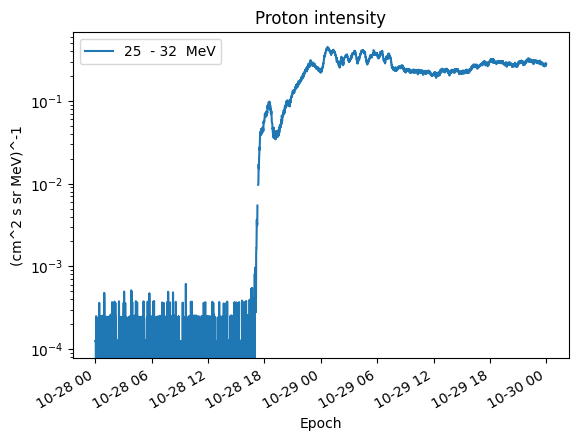

In [22]:
df.PH_3.plot(logy=True, ylabel=meta['PH_UNITS'], label=meta['P_E_label'][3], title=meta['PH_LABL'])
plt.legend()

---
# STEREO (stereo-loader) <a class="anchor" id="stereo-loader"></a>

- GitHub: https://github.com/jgieseler/stereo-loader

Python data loader for some STEREO instruments (i.e., magnetic field and charged particles). At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

- ``'HET'``: STEREO IMPACT/HET Level 1 Data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_HET)) 
- ``'LET'``: STEREO IMPACT/LET Level 1 Data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_LET))
- ``'MAG'``: STEREO IMPACT/MAG Magnetic Field Vectors (RTN or SC) ([Info RTN](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAG_RTN), [Info SC](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAG_SC))
- ``'MAGB'``: STEREO IMPACT/MAG Burst Mode (~0.03 sec) Magnetic Field Vectors (RTN or SC) ([Info RTN](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAGB_RTN), [Info SC](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAGB_SC))
- ``'SEPT'``: STEREO IMPACT/SEPT Level 2 Data ([Info 1](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/about.txt), [Info 2](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/SEPT_L2_description.pdf)) [1]

[1] STEREO IMPACT/SEPT Level 2 data is directly obtained through ASCII files from the [server of the instrument team](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/), not via SunPy/CDAWeb.

#### Local installation

In order to run it locally on your computer, you need to install `stereo-loader` via pip:
``` bash
$ pip install git+https://github.com/jgieseler/stereo-loader
```

#### Imports

In [23]:
from stereo_loader import stereo_load
import datetime as dt

#### Define options

-  ``instrument``: ``'HET'``, ``'LET'``, ``'MAG'``, ``'MAGB'``, or ``'SEPT'``. See above for explanation.
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``spacecraft``: String, optional. Name of STEREO spacecraft: ``'ahead'`` or ``'behind'``, by default ``'ahead'``.
-  ``mag_coord``: String, optional. Coordinate system for MAG: ``'RTN'`` or ``'SC'``, by default ``'RTN'``.
-  ``sept_species``: String, optional. Particle species for SEPT: ``'e'`` for electrons or ``'p'`` for protons (resp. ions), by default ``'e'``.
-  ``sept_viewing``: String, optional. Viewing direction for SEPT: ``'sun'``, ``'asun'``, ``'north'``, or ``'south'``, by default ``'sun'``.
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/stereo/'``. By default ``None``. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data).
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data is resamepled. By default ``None``.
-  ``pos_timestamp``: String, optional. Change the position of the timestamp: ``'center'`` or ``'start'`` of the accumulation interval, by default ``None``.
-  ``max_conn``: Integer, optional. The number of parallel download slots used by ``Fido.fetch``, by default ``5``.

In [24]:
instrument = "HET"
startdate = dt.datetime(2021, 10, 28)
enddate = "2021/10/30"
path = None
resample = "1min"
pos_timestamp = None

#### Load data

In [25]:
df, meta = stereo_load(instrument=instrument, startdate=startdate, enddate=enddate,
                       path=path, resample=resample, pos_timestamp=pos_timestamp)

In [26]:
df

,Electron_Flux_0,Electron_Flux_1,Electron_Flux_2,Electron_Sigma_0,Electron_Sigma_1,Electron_Sigma_2,Proton_Flux_0,Proton_Flux_1,Proton_Flux_2,Proton_Flux_3,...,Proton_Sigma_1,Proton_Sigma_2,Proton_Sigma_3,Proton_Sigma_4,Proton_Sigma_5,Proton_Sigma_6,Proton_Sigma_7,Proton_Sigma_8,Proton_Sigma_9,Proton_Sigma_10
Epoch,,,,,,,,,,,,,,,,,,,,,
2021-10-28 00:00:30,0.118114,0.000000,0.000000,0.068193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000974
2021-10-28 00:01:30,0.000000,0.019692,0.022974,0.000000,0.019692,0.022974,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000975
2021-10-28 00:02:30,0.000000,0.059097,0.000000,0.000000,0.034120,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000975
2021-10-28 00:03:30,0.078742,0.000000,0.000000,0.055679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000689
2021-10-28 00:04:30,0.000000,0.019686,0.000000,0.000000,0.019686,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-29 23:55:30,8.474209,4.318587,1.235822,0.587581,0.296602,0.171378,5.122158,4.560346,3.294433,2.073254,...,0.247684,0.201240,0.139462,0.130330,0.107363,0.091214,0.096674,0.057675,0.019861,0.006876
2021-10-29 23:56:30,7.374192,3.544501,1.354651,0.548119,0.268708,0.179428,4.897008,4.425822,3.663213,2.354692,...,0.244003,0.212204,0.148627,0.122723,0.097886,0.082833,0.102539,0.057675,0.020811,0.008098
2021-10-29 23:57:30,8.229761,4.461182,1.212056,0.579044,0.301459,0.169722,5.291020,4.345108,3.282140,1.932536,...,0.241768,0.200864,0.134646,0.133336,0.100429,0.082178,0.092821,0.050200,0.019861,0.007679


In [27]:
meta

{'Electron_Bins_Text': array([['0.7 - 1.4 MeV'],
        ['1.4 - 2.8 MeV'],
        ['2.8 - 4.0 MeV']], dtype='<U13'),
 'Electron_Flux_UNITS': '#/(cm2-steradian-second-MeV/nucleon) ',
 'Electron_Flux_FILLVAL': -1e+31,
 'Proton_Bins_Text': array([['13.6 - 15.1 MeV '],
        ['15.0 - 17.1 MeV '],
        ['17.0 - 19.3 MeV '],
        ['20.8 - 23.8 MeV '],
        ['23.8 - 26.4 MeV '],
        ['26.3 - 29.7 MeV '],
        ['29.6 - 33. 4 MeV'],
        ['33.4 - 35.8 MeV '],
        ['35.6 - 40.5 MeV '],
        ['40 - 60 MeV     '],
        ['60 - 100 MeV    ']], dtype='<U16'),
 'Proton_Flux_UNITS': '#/(cm2-steradian-second-MeV/nucleon) ',
 'Proton_Flux_FILLVAL': -1e+31,
 'channels_dict_df_e':       ch_strings  lower_E  upper_E   DE    mean_E
 0  0.7 - 1.4 MeV      0.7      1.4  0.7  0.989949
 1  1.4 - 2.8 MeV      1.4      2.8  1.4  1.979899
 2  2.8 - 4.0 MeV      2.8      4.0  1.2  3.346640,
 'channels_dict_df_p':           ch_strings  lower_E  upper_E    DE     mean_E
 0   13.6 - 15.

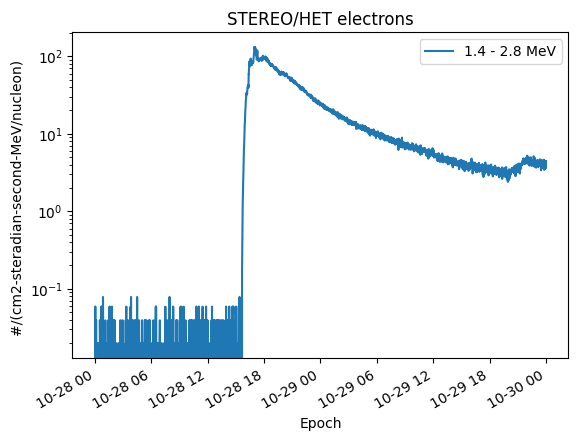

In [28]:
df.Electron_Flux_1.plot(logy=True, ylabel=meta['Electron_Flux_UNITS'], label=meta['Electron_Bins_Text'][1][0], 
                        title='STEREO/HET electrons')
plt.legend()

---
# Wind/3DP (wind-3dp-loader) <a class="anchor" id="wind-3dp-loader"></a>

- GitHub: https://github.com/jgieseler/wind-3dp-loader

Python data loader for Wind/3DP instrument. At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

- `'WI_SFSP_3DP'`: Electron omnidirectional fluxes 27 keV - 520 keV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SFSP_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sfsp_3dp_00000000_v01.skt))
- `'WI_SFPD_3DP'`: Electron energy-angle distributions 27 keV to 520 keV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SFPD_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sfpd_3dp_00000000_v01.skt))
- `'WI_SOSP_3DP'`: Proton omnidirectional fluxes 70 keV - 6.8 MeV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SOSP_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sosp_3dp_00000000_v01.skt))
- `'WI_SOPD_3DP'`: Proton energy-angle distributions 70 keV - 6.8 MeV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SOPD_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sopd_3dp_00000000_v01.skt))

Note that for Wind/3DP, energies are usually provided in eV (and not keV or MeV)!

#### Local installation

In order to run it locally on your computer, you need to install `wind-3dp-loader` via pip:
``` bash
$ pip install git+https://github.com/jgieseler/wind-3dp-loader
```

#### Imports

In [1]:
from wind_3dp_loader import wind3dp_load
import datetime as dt

#### Define options


-  ``dataset``: ``'WI_SFSP_3DP'``, ``'WI_SFPD_3DP'``, ``'WI_SOSP_3DP'``, or ``'WI_SOPD_3DP'``. See above for explanation.
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data (~24 seconds) is resamepled. By default ``'1min'``.
-  ``multi_index``: ``True``, or ``False`` (boolean), optional. Provide output for pitch-angle resolved data as Pandas Dataframe with multiindex. By default ``True``.
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/wind/3dp/'``. By default `None`. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data>).
-  ``threshold``: Integer or float, optional. Replace all FLUX values in ``df`` above ``threshold`` with ``np.nan``, by default ``None``.

In [2]:
dataset = "WI_SFSP_3DP"
startdate = dt.datetime(2021, 10, 28)
enddate = "2021/10/30"
multi_index = False
path = None
resample = "1min"

#### Load data

In [3]:
df, meta = wind3dp_load(dataset=dataset, startdate=startdate, enddate=enddate,
                        multi_index=multi_index, path=path, resample=resample)

In [4]:
df

,TIME,FLUX_0,FLUX_1,FLUX_2,FLUX_3,FLUX_4,FLUX_5,FLUX_6,ENERGY_0,ENERGY_1,ENERGY_2,ENERGY_3,ENERGY_4,ENERGY_5,ENERGY_6
Time,,,,,,,,,,,,,,,
2021-10-28 00:00:30,1.635379e+09,0.051309,0.000223,0.000024,0.000012,0.000007,0.000003,0.000001,26994.957031,40138.667969,66172.257812,108440.953125,181782.484375,309508.9375,516823.40625
2021-10-28 00:01:30,1.635379e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-28 00:02:30,1.635379e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-28 00:03:30,1.635379e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-28 00:04:30,1.635379e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-29 23:55:30,1.635552e+09,0.077283,0.022559,0.008904,0.003542,0.001546,0.000674,0.000551,26994.957031,40138.667969,66172.257812,108440.953125,181782.484375,309508.9375,516823.40625
2021-10-29 23:56:30,1.635552e+09,0.077087,0.022568,0.008863,0.003578,0.001585,0.000687,0.000549,26994.957031,40138.667969,66172.257812,108440.953125,181782.484375,309508.9375,516823.40625
2021-10-29 23:57:30,1.635552e+09,0.077987,0.022398,0.008843,0.003579,0.001587,0.000683,0.000541,26994.957031,40138.667969,66172.257812,108440.953125,181782.484375,309508.9375,516823.40625


In [33]:
meta

{'channels_dict_df':                  mean_E             DE        lower_E        upper_E  \
 ENERGY_0   26994.957031    8098.487305   18896.468750   35093.445312   
 ENERGY_1   40138.664062   12041.599609   28097.064453   52180.265625   
 ENERGY_2   66172.257812   19851.677734   46320.578125   86023.937500   
 ENERGY_3  108440.960938   32532.289062   75908.671875  140973.250000   
 ENERGY_4  181782.484375   54534.746094  127247.734375  236317.234375   
 ENERGY_5  309509.000000   92852.703125  216656.296875  402361.687500   
 ENERGY_6  516823.437500  155047.031250  361776.406250  671870.500000   
 
                     Bins_Text  
 ENERGY_0     18.9 - 35.09 keV  
 ENERGY_1     28.1 - 52.18 keV  
 ENERGY_2    46.32 - 86.02 keV  
 ENERGY_3   75.91 - 140.97 keV  
 ENERGY_4  127.25 - 236.32 keV  
 ENERGY_5  216.66 - 402.36 keV  
 ENERGY_6  361.78 - 671.87 keV  ,
 'APPROX_ENERGY_LABELS': array([['EnergyCh1_Often~27000eV '],
        ['EnergyCh2_Often~40500eV '],
        ['EnergyCh3_Often~860

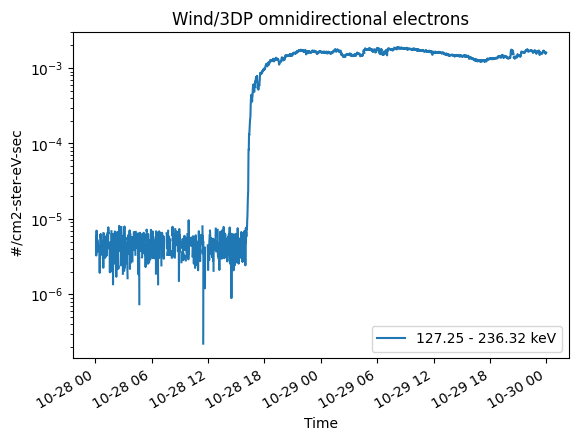

In [34]:
df.FLUX_4.plot(logy=True, ylabel=meta['FLUX_UNITS'], label=meta['channels_dict_df']['Bins_Text'].values[4], 
               title='Wind/3DP omnidirectional electrons')
plt.legend()

---
# FAQ / Problems <a class="anchor" id="faq"></a>

- **I get some error about missing data, or that the data is broken, or something I don't understand.**

Most times such a problem originates in an incomplete download of the corresponding data file. The easiest approach to solve that problem is to delete the file and run the code again to re-download it. 
To do this, first check if a `path` has been provided. If `path` has *not* been defined (or as `None`), the standard `path` for SunPy downloads should have been used. You can obtain it by running the following code cell:


In [ ]:
import sunpy 
sunpy.config.get('downloads', 'download_dir')

Open the corresponding directory in your file browser and look for the corresponding data file. Usually it's easiest to order the files by modification date, so that the latest modified file (which usually should be the culprit) comes first. Then delete the corresponding file(s), and run the code again.